In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


df = pd.read_csv('df.csv')
df.shape

(2107, 20)

In [2]:
df = df.drop(columns = ['NObeyesdad', 'BMI', 'Outliers', 'Weight'])
df

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Level
0,Female,21.000000,1.620000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal
1,Female,21.000000,1.520000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal
2,Male,23.000000,1.800000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal
3,Male,27.000000,1.800000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight
4,Male,22.000000,1.780000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,Female,20.976842,1.710730,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_III
2103,Female,21.982942,1.748584,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_III
2104,Female,22.524036,1.752206,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_III
2105,Female,24.361936,1.739450,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_III


In [10]:
X = df.drop('Level', axis = 1)
y = df['Level']
X = pd.get_dummies(X)
le = LabelEncoder()
le.fit(y)


le.classes_

y = le.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## XGBoost

params = {
            'objective':'multi:softprob',
            'max_depth': 5,
            'learning_rate': 0.1,
            'n_estimators':160
        }         
           

# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)
accuracy_score(y_pred, y_test)


0.8578199052132701

In [14]:
le.classes_

array(['Normal', 'Obesity_I', 'Obesity_II', 'Obesity_III', 'Overweight',
       'Underweight'], dtype=object)

In [13]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[46,  3,  0,  0, 12,  4],
       [ 6, 56,  3,  0,  6,  0],
       [ 2,  1, 69,  3,  1,  0],
       [ 0,  0,  1, 48,  0,  0],
       [10,  3,  1,  0, 94,  0],
       [ 2,  0,  0,  0,  2, 49]], dtype=int64)

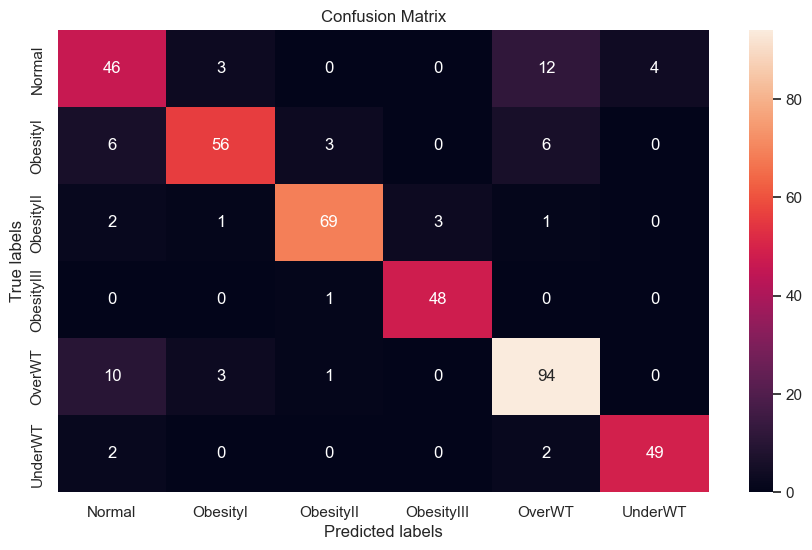

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt     
sns.set_theme(rc={'figure.figsize':(10.5,6)})
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation





# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Normal', 'ObesityI', 'ObesityII', 'ObesityIII', 'OverWT',
       'UnderWT']); ax.yaxis.set_ticklabels(['Normal', 'ObesityI', 'ObesityII', 'ObesityIII', 'OverWT',
       'UnderWT']);